# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

## Exercicio 2.1 - Problema Não Linearmente separável

## Exercicio 2.2 - Overfitting e Underfitting

## Exercicio 2.3 - Aproximação polinomial em camadas

Inicialmente iremos gerar os dados de treinamento. A partir da função geradora 𝑓𝑔(𝑥) = 12𝑥ˆ2 + 3𝑥 + 10.
O vetor X contem amostras da função geradora amostrado de uma distribuição Normal com média 0 e desvio padrão unitário.

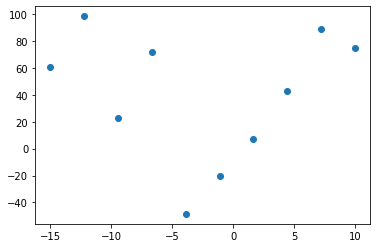

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = np.linspace(-15,10,10)

def fgx(X):
    return 0.5*X**2 + 3*X + 10

mu, sigma = 0, 4
Y = fgx(X) + 10 * np.random.normal(mu, sigma, len(X)) # Y<-fgx(X) + 10*rnorm(length(X))

#print da função
plt.scatter(X,Y)
plt.show()

Criação da Matriz H e  obtenção dos pesos w correspondentes a solução final dos coeficientes do polinômio aproximador.

In [11]:
# O nuúmero de parâmetros de um neurônio tipo MCP será sempre n + 1, onde n  é o número de variáveis, ou dimensão, do espaço de entrada.
H = pd.DataFrame({'x2': X**2, 'x': X, '1': 1}) # > H<-cbind(X^2,X,1)
# print(H)

# Como y = H * w, podemos encontrar w pela multiplicação da pseudoinversa de H e y.
w = np.dot(pd.DataFrame(np.linalg.pinv(H.values), H.columns, H.index), Y) # w<-pseudoinverse(H) %*% Y
print('w: ', w)


w:  [0.56992369 2.83585106 7.05672025]


Podemos mensurar a qualidade dos pesos adiquiridos comparando com os pesos da equação geradora:  0.5 , 3 , 10

Vamos utilizar o modelo gerado para estimar novos valores da função geradora.

In [12]:
# Novos valores a serem utilizados
xgrid = np.arange(-15,10,0.1)
ygrid = fgx(xgrid)
# print('xgrid: ', xgrid,'ygrid: ',  ygrid)

# Gerar uma nova Matriz Hgrid para as entradas de teste xgrid
Hgrid = pd.DataFrame({'x2': xgrid**2, 'x': xgrid, '1': 1})
# print('Hgrid: ', Hgrid)

# Verificar a saída yhatgrid gerada a partir da multiplicação matricial de Hgrid com os valores w pesos encontrados
yhatgrid = np.dot(Hgrid, w) # > yhatgrid<-Hgrid %*% w
# print('yhatgrid: ', yhatgrid)

Plot dos valores iniciais a serem testados em pontos azuis.

Plot da função geradora em linha azul.

Plot da função aproximada em linha vermelha.

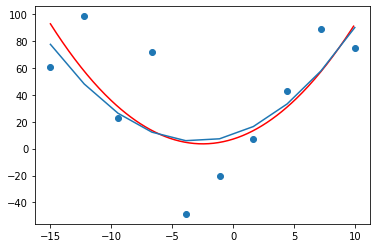

In [13]:
#print da função
plt.scatter(X,Y) # dados gerados
plt.plot(xgrid, yhatgrid, 'r') # função aproximada
plt.plot(X,fgx(X)) #função geradora
plt.show()